# CYBER SECURITY INTRUSION - MACHINE LEARNINHG PROJECT

#### IMPORTING LIBRARIES NEEDED

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
from collections import Counter

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

import joblib
import json

In [2]:
import warnings
warnings.filterwarnings("ignore")

## LOADING THE DATASET

In [50]:
Data = pd.read_csv("cybersecurity_intrusion_data.csv")
Data

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,SID_09533,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,SID_09534,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,SID_09535,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


## CHECKING THE DATASET 

In [51]:
Data.shape

(9537, 11)

In [52]:
Data.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [53]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [54]:
Data.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


## DATA CLEANING

#### DROPING THE UNNECESSARY COLUMN

In [55]:
Data.drop(columns=['session_id'],inplace=True)

#### HANDLING THE MISSING VALUE

In [56]:
Data.isnull().sum()

network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [57]:
Data.dropna(inplace=True)

#### REMOVING DUPLICATES

In [11]:
Data.drop_duplicates(inplace=True)

In [58]:
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']
label_encoders = {}

for col in categorical_cols :
    Encoder = LabelEncoder()
    Data[col] = Encoder.fit_transform(Data[col])
    label_encoders[col] = Encoder

## EXPLORATORY DATA ANALYSIS

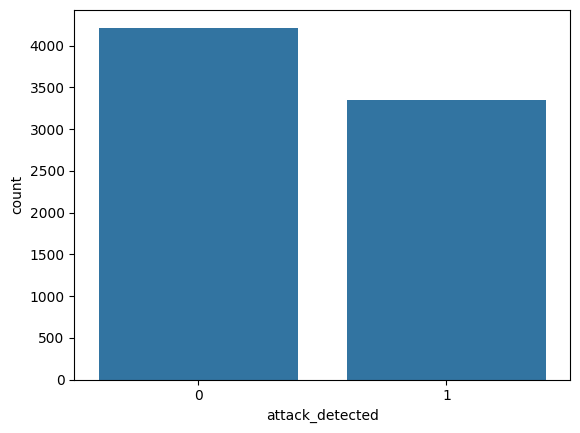

In [59]:
sns.countplot(data=Data,x='attack_detected')
plt.show()

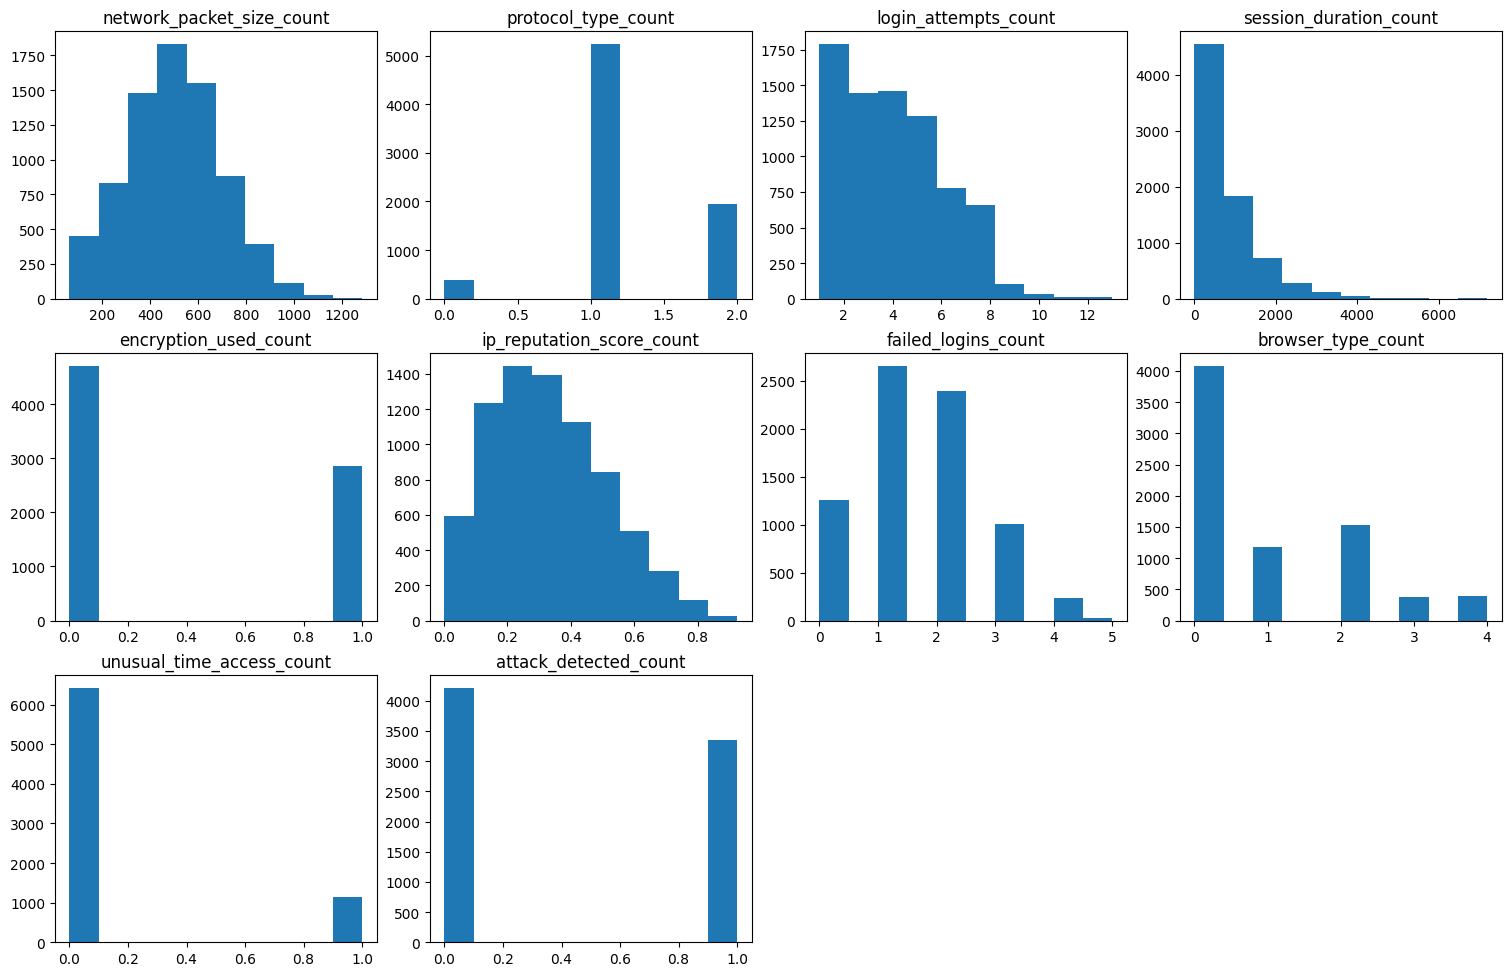

In [60]:
col_count=['network_packet_size','protocol_type','login_attempts','session_duration','encryption_used',
           'ip_reputation_score','failed_logins','browser_type','unusual_time_access','attack_detected']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(col_count)):
    plt.subplot(5,4,i+1)
    plt.hist(data=Data,x=col_count[i])
    plt.title(col_count[i]+'_count')
plt.show()

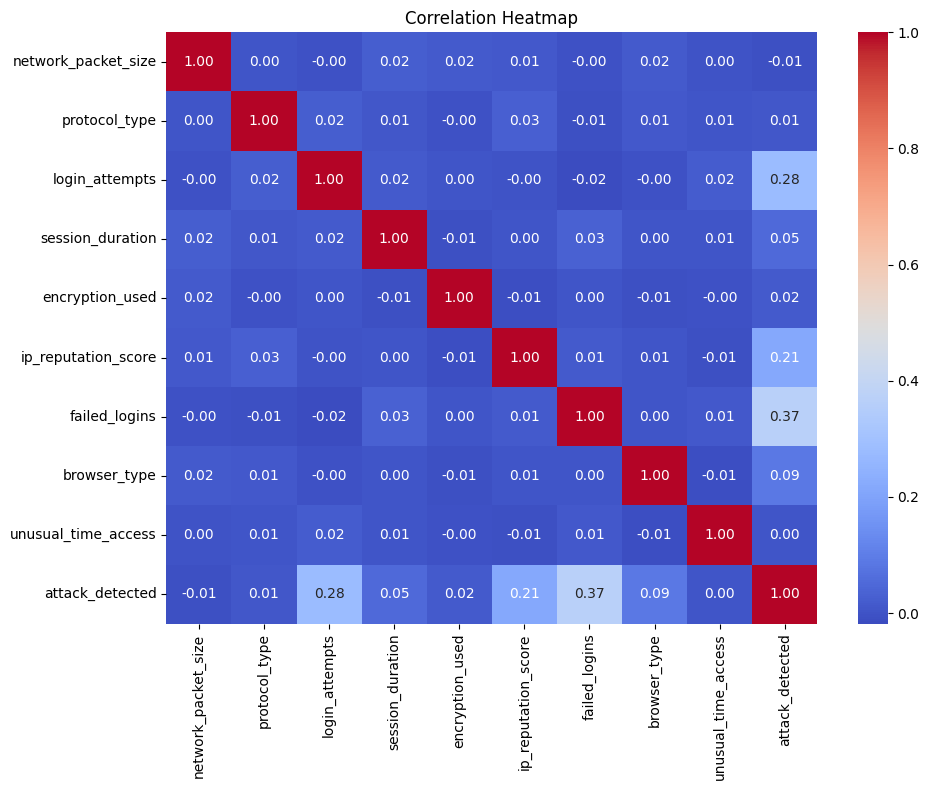

In [61]:
numeric_df = Data.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric data for a correlation heatmap.')

#### OUTLIER DETECTION AND REMOVAL

<Axes: >

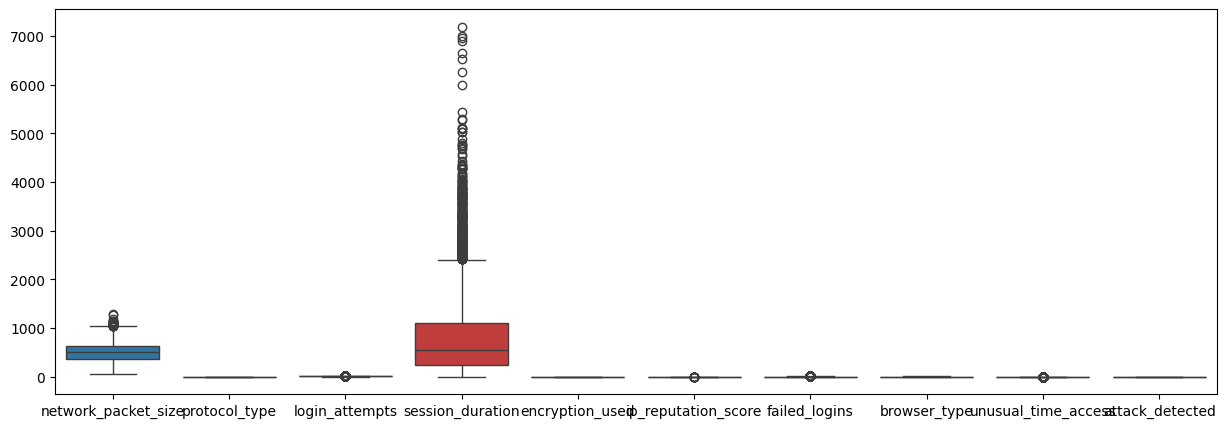

In [62]:
plt.figure(figsize=(15,5))
sns.boxplot(Data)

In [63]:
def iterative_iqr_outlier_removal_all_columns(Data):
    numeric_cols = Data.select_dtypes(include=['number']).columns
    for column in numeric_cols:
        iteration = 0
        while True:
            iteration += 1
            Q1 = Data[column].quantile(0.25)
            Q3 = Data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            filtered_df = Data[(Data[column] >= lower_bound) & (Data[column] <= upper_bound)]

            if len(filtered_df) == len(Data):
                print(f"{column}: No more outliers detected after {iteration-1} iterations")
                break
            else:
                print(f"{column} - Iteration {iteration}: Removed {len(Data) - len(filtered_df)} outliers")
                Data = filtered_df
    return Data

# Example usage:
Data = iterative_iqr_outlier_removal_all_columns(Data)
Data

network_packet_size - Iteration 1: Removed 32 outliers
network_packet_size: No more outliers detected after 1 iterations
protocol_type: No more outliers detected after 0 iterations
login_attempts - Iteration 1: Removed 161 outliers
login_attempts: No more outliers detected after 1 iterations
session_duration - Iteration 1: Removed 337 outliers
session_duration - Iteration 2: Removed 124 outliers
session_duration - Iteration 3: Removed 50 outliers
session_duration - Iteration 4: Removed 22 outliers
session_duration - Iteration 5: Removed 14 outliers
session_duration - Iteration 6: Removed 7 outliers
session_duration - Iteration 7: Removed 3 outliers
session_duration - Iteration 8: Removed 1 outliers
session_duration: No more outliers detected after 8 iterations
encryption_used: No more outliers detected after 0 iterations
ip_reputation_score - Iteration 1: Removed 14 outliers
ip_reputation_score - Iteration 2: Removed 1 outliers
ip_reputation_score: No more outliers detected after 2 ite

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,1,4,492.983263,1,0.606818,1,1,0,1
1,472,1,3,1557.996461,1,0.301569,0,2,0,0
2,629,1,3,75.044262,1,0.739164,2,0,0,1
3,804,2,4,601.248835,1,0.123267,0,4,0,1
4,453,1,5,532.540888,0,0.054874,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
9524,315,2,3,1339.802736,1,0.435285,3,3,0,1
9525,336,1,5,118.889450,1,0.611286,0,1,0,1
9531,746,1,7,315.151758,1,0.190059,3,0,0,1
9532,194,0,3,226.049889,0,0.517737,3,0,0,1


<Axes: >

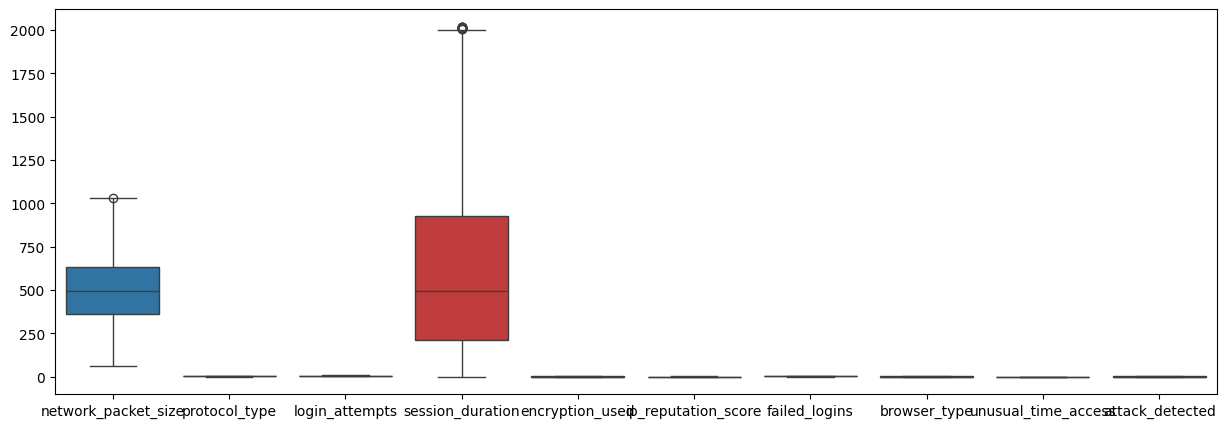

In [64]:
plt.figure(figsize=(15,5))
sns.boxplot(Data)

#### CHECKING THE SKEWNESS

In [65]:
Data.skew()

network_packet_size    0.034476
protocol_type          0.229799
login_attempts         0.256016
session_duration       0.847087
encryption_used        0.496414
ip_reputation_score    0.443299
failed_logins          0.081489
browser_type           1.082175
unusual_time_access    0.000000
attack_detected        0.381236
dtype: float64

In [66]:
X = Data.drop('attack_detected', axis=1)
Y = Data['attack_detected']

# Get numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Apply Quantile Transformation to make uniform distribution
qt = QuantileTransformer(output_distribution='uniform', random_state=42)
X_transformed = X.copy()
X_transformed[numeric_cols] = qt.fit_transform(X[numeric_cols])

# Combine back
Data = pd.concat([X_transformed, Y], axis=1)

# Check skewness (should be near 0)
print("Skewness after Quantile transformation (uniform):")
print(X_transformed.skew())

# Save the transformed data
Data.to_csv('Data.csv', index=False)

Skewness after Quantile transformation (uniform):
network_packet_size   -0.002192
protocol_type          0.700389
login_attempts        -0.056693
session_duration      -0.000031
encryption_used        0.496414
ip_reputation_score    0.000004
failed_logins         -0.045187
browser_type           0.304103
unusual_time_access    0.000000
dtype: float64


#### BALANCING THE TARGET DISTRIBUTION

In [67]:
X = Data.drop('attack_detected', axis=1)
Y = Data['attack_detected']

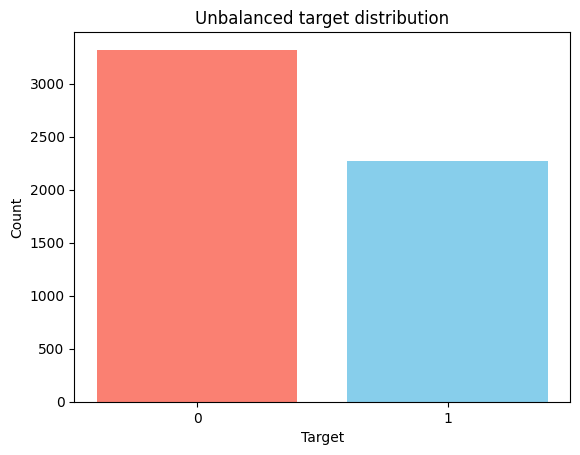

Target distribution: Counter({0: 3320, 1: 2273})


In [68]:
target_counts=Counter(Y)
plt.bar(target_counts.keys(),target_counts.values(),color=['skyblue',"salmon"])
plt.xticks([0,1])
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Unbalanced target distribution")
plt.show()

print("Target distribution:",target_counts)

In [69]:
smote = SMOTE(random_state=42)
X,Y = smote.fit_resample(X, Y)
print("Resampled dataset shape:",Counter(Y))

Resampled dataset shape: Counter({1: 3320, 0: 3320})


#### SPLITING THE DATA 

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## MODEL SELECTION

In [71]:
log_score=cross_val_score(LogisticRegression(),X,Y)
dc_score=cross_val_score(DecisionTreeClassifier(max_depth=3),X,Y)
svm_score=cross_val_score(SVC(),X,Y)
naiveg_score=cross_val_score(GaussianNB(var_smoothing=0.00001),X,Y)
naivem_score=cross_val_score(MultinomialNB(),X,Y)
knnc_score=cross_val_score(KNeighborsClassifier(n_neighbors=7),X,Y)
randomc_score=cross_val_score(RandomForestClassifier(n_estimators=47,random_state=34),X,Y)
gradc_score=cross_val_score(GradientBoostingClassifier(n_estimators=4,random_state=7),X,Y)
xg_score=cross_val_score(XGBClassifier(),X,Y)

In [72]:
print("Logistic_Regression_Score         :",log_score)
print("Decision_Tree_Classifier_Score    :",dc_score)
print("SVM_Score                         :",svm_score)
print("Naive_Gaussian_Score              :",naiveg_score)
print("Naive_Multinomial_Score           :",naivem_score)
print("KNN_Classifier_Score              :",knnc_score)
print("RandomForestTree_Classifier_Score :",randomc_score)
print("GradientBoosting_Classifier_Score :",gradc_score)
print("XGBoosting_Score                  :",xg_score)

Logistic_Regression_Score         : [0.66942771 0.6686747  0.69201807 0.66490964 0.68298193]
Decision_Tree_Classifier_Score    : [0.82756024 0.82906627 0.83810241 0.85391566 0.85542169]
SVM_Score                         : [0.78012048 0.80271084 0.80271084 0.79668675 0.80572289]
Naive_Gaussian_Score              : [0.71385542 0.71385542 0.74322289 0.71611446 0.73795181]
Naive_Multinomial_Score           : [0.59638554 0.60918675 0.62274096 0.625      0.62274096]
KNN_Classifier_Score              : [0.7251506  0.74849398 0.73644578 0.77635542 0.80346386]
RandomForestTree_Classifier_Score : [0.86144578 0.85542169 0.86972892 0.90888554 0.93448795]
GradientBoosting_Classifier_Score : [0.82756024 0.82906627 0.83810241 0.85316265 0.85542169]
XGBoosting_Score                  : [0.84939759 0.85391566 0.86822289 0.90210843 0.93298193]


In [73]:
print("Logistic_Regression        :",np.mean(log_score))
print("Decision_Tree_Classifier   :",np.mean(dc_score))
print("SVM                        :",np.mean(svm_score))
print("Naive_Gaussian             :",np.mean(naiveg_score))
print("Naive_Multinomial          :",np.mean(naivem_score))
print("KNN_Classifier             :",np.mean(knnc_score))
print("RandomForestTree_Classifier:",np.mean(randomc_score))
print("GradientBoosting_Classifier:",np.mean(gradc_score))
print("XGBoosting                 :",np.mean(xg_score))

Logistic_Regression        : 0.6756024096385542
Decision_Tree_Classifier   : 0.8408132530120481
SVM                        : 0.7975903614457831
Naive_Gaussian             : 0.725
Naive_Multinomial          : 0.615210843373494
KNN_Classifier             : 0.7579819277108434
RandomForestTree_Classifier: 0.8859939759036145
GradientBoosting_Classifier: 0.8406626506024096
XGBoosting                 : 0.8813253012048193


In [76]:
forest_model= RandomForestClassifier()

In [77]:
gscv=GridSearchCV(forest_model,{'n_estimators':[100,200,500,1000],'max_depth':[100,200,500,1000]},cv=5,return_train_score=True)

In [78]:
gscv.fit(X_train,Y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [100, 200, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,1000


In [79]:
gs_data=gscv.cv_results_
gs_data

{'mean_fit_time': array([0.93050194, 1.87763929, 4.44658008, 9.72943864, 0.9004384 ,
        1.53217945, 3.79605632, 7.42432666, 0.73367081, 1.53015175,
        3.7294147 , 7.38040814, 0.88350396, 1.85747843, 4.37467647,
        7.65167761]),
 'std_fit_time': array([0.16059691, 0.20628541, 0.34653307, 0.25032829, 0.04835814,
        0.04529564, 0.17576085, 0.50759187, 0.03262662, 0.08908692,
        0.15167297, 0.21448907, 0.05307724, 0.13506253, 0.40229378,
        0.24015446]),
 'mean_score_time': array([0.02910419, 0.04592276, 0.10749454, 0.21847601, 0.02046332,
        0.04171362, 0.08206148, 0.18725352, 0.0227284 , 0.03693223,
        0.09361773, 0.16760716, 0.01623778, 0.04279776, 0.09084392,
        0.19750967]),
 'std_score_time': array([0.00502237, 0.01447605, 0.03000868, 0.01120781, 0.00582628,
        0.01148669, 0.01292668, 0.01833347, 0.00387294, 0.00550862,
        0.01698388, 0.0222328 , 0.00287921, 0.0137282 , 0.01036071,
        0.03152077]),
 'param_max_depth': masked

In [80]:
result=pd.DataFrame(gs_data)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.930502,0.160597,0.029104,0.005022,100,100,"{'max_depth': 100, 'n_estimators': 100}",0.875823,0.903104,0.882298,...,0.884976,0.014018,16,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.877639,0.206285,0.045923,0.014476,100,200,"{'max_depth': 100, 'n_estimators': 200}",0.875823,0.902164,0.885122,...,0.887047,0.014144,11,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,4.446580,0.346533,0.107495,0.030009,100,500,"{'max_depth': 100, 'n_estimators': 500}",0.877705,0.909690,0.881356,...,0.888741,0.016959,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,9.729439,0.250328,0.218476,0.011208,100,1000,"{'max_depth': 100, 'n_estimators': 1000}",0.877705,0.906867,0.882298,...,0.887988,0.015773,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.900438,0.048358,0.020463,0.005826,200,100,"{'max_depth': 200, 'n_estimators': 100}",0.877705,0.907808,0.880414,...,0.886104,0.014936,15,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.532179,0.045296,0.041714,0.011487,200,200,"{'max_depth': 200, 'n_estimators': 200}",0.877705,0.903104,0.882298,...,0.886859,0.014946,13,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,3.796056,0.175761,0.082061,0.012927,200,500,"{'max_depth': 200, 'n_estimators': 500}",0.876764,0.907808,0.883239,...,0.887611,0.015915,10,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,7.424327,0.507592,0.187254,0.018333,200,1000,"{'max_depth': 200, 'n_estimators': 1000}",0.876764,0.905927,0.886064,...,0.888365,0.015493,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,0.733671,0.032627,0.022728,0.003873,500,100,"{'max_depth': 500, 'n_estimators': 100}",0.878645,0.906867,0.881356,...,0.887046,0.015631,12,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,1.530152,0.089087,0.036932,0.005509,500,200,"{'max_depth': 500, 'n_estimators': 200}",0.876764,0.904986,0.883239,...,0.886858,0.014117,14,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [81]:
gscv.best_params_

{'max_depth': 500, 'n_estimators': 1000}

In [82]:
gscv.best_score_

0.8887409580602814

## MODEL TRAINING AND EVALUATION

Test accuracy: 0.8629518072289156
train accuracy: 0.8757530120481928
CR:               precision    recall  f1-score   support

           0       0.78      1.00      0.88       660
           1       1.00      0.73      0.84       668

    accuracy                           0.86      1328
   macro avg       0.89      0.86      0.86      1328
weighted avg       0.89      0.86      0.86      1328



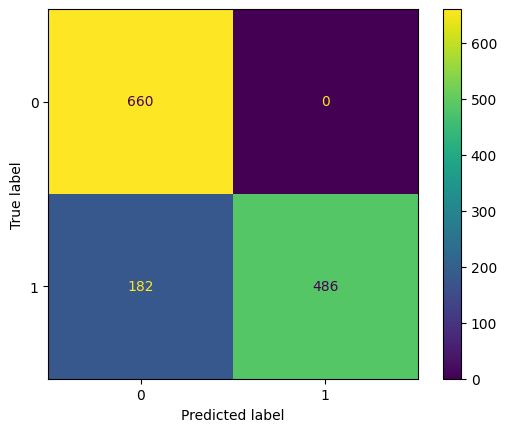

In [84]:
Model=RandomForestClassifier(max_depth=10,max_features='sqrt')
Model.fit(X_train,Y_train)
Y_pred=Model.predict(X_test)
print('Test accuracy:',Model.score(X_test,Y_test))
print('train accuracy:',Model.score(X_train,Y_train))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))
print('CR:',classification_report(Y_test,Y_pred))
rft=accuracy_score(Y_test,Y_pred)*100
Y_tpred3=Model.predict(X_train)
rftt=accuracy_score(Y_tpred3,Y_train)*100


## SAVING THE MODEL

In [85]:
feature_cols = X.columns.tolist()

In [86]:
joblib.dump(Model,'intrusion_model.pkl')
joblib.dump(label_encoders,'label_encoder.pkl')
joblib.dump(feature_cols,'feature_cols.pkl')

['feature_cols.pkl']

In [88]:
category_mappings = {
    col: list(label_encoders[col].classes_)for col in categorical_cols
    }
with open("category_mappings.json","w") as f:
    json.dump(category_mappings,f,indent=2)